In [ ]:
# Import required libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score

# Ensure Jupyter Notebook displays plots inline
%matplotlib inline
sns.set_style("whitegrid")
plt.style.use("fivethirtyeight")


In [ ]:
df = pd.read_csv("C:/Users/Levovo/OneDrive/Desktop/heart.csv")
df.head()

# Feature Engineering: Creating a new feature (Cholesterol per Age ratio)
df['chol_age_ratio'] = df['chol'] / df['age']

# Creating a new feature (Age Group)
df['age_group'] = pd.cut(df['age'], bins=[29, 39, 49, 59, 69, 79], labels=['30-39', '40-49', '50-59', '60-69', '70-79'])

# Display dataset after feature engineering
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,chol_age_ratio,age_group
0,63,1,3,145,233,1,0,150,0,2.30,0,0,1,1,3.70,60-69
1,37,1,2,130,250,0,1,187,0,3.50,0,0,2,1,6.76,30-39
2,41,0,1,130,204,0,0,172,0,1.40,2,0,2,1,4.98,40-49
3,56,1,1,120,236,0,1,178,0,0.80,2,0,2,1,4.21,50-59
4,57,0,0,120,354,0,1,163,1,0.60,2,0,2,1,6.21,50-59



Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   age             303 non-null    int64   
 1   sex             303 non-null    int64   
 2   cp              303 non-null    int64   
 3   trestbps        303 non-null    int64   
 4   chol            303 non-null    int64   
 5   fbs             303 non-null    int64   
 6   restecg         303 non-null    int64   
 7   thalach         303 non-null    int64   
 8   exang           303 non-null    int64   
 9   oldpeak         303 non-null    float64 
 10  slope           303 non-null    int64   
 11  ca              303 non-null    int64   
 12  thal            303 non-null    int64   
 13  target          303 non-null    int64   
 14  chol_age_ratio  303 non-null    float64 
 15  age_group       302 non-null    category
dtypes: category(1), float64(2), int64(13)
me

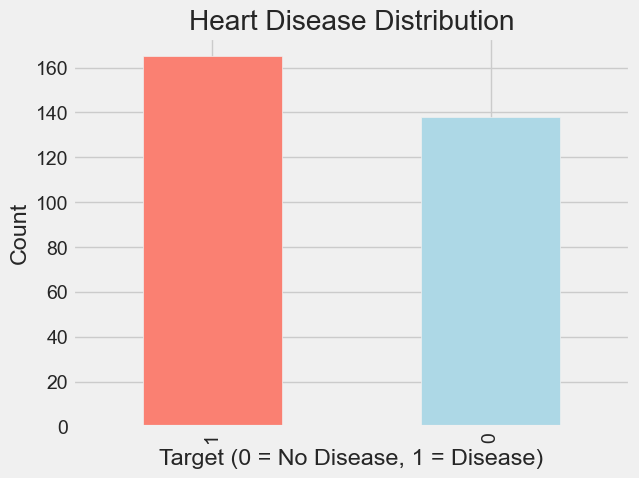

In [123]:
# Basic dataset info
print("\nDataset Information:")
print(df.info())

# Check for missing values
print("\nMissing Values Count:")
print(df.isna().sum())

# Plot target variable distribution
df['target'].value_counts().plot(kind="bar", color=["salmon", "lightblue"])
plt.title("Heart Disease Distribution")
plt.xlabel("Target (0 = No Disease, 1 = Disease)")
plt.ylabel("Count")
plt.show()


In [124]:
# Feature Engineering: Creating a new feature (Cholesterol per Age ratio)
df['chol_age_ratio'] = df['chol'] / df['age']

# Creating a new feature (Age Group)
df['age_group'] = pd.cut(df['age'], bins=[29, 39, 49, 59, 69, 79], labels=['30-39', '40-49', '50-59', '60-69', '70-79'])

# Display dataset after feature engineering
df.head()


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,chol_age_ratio,age_group
0,63,1,3,145,233,1,0,150,0,2.30,0,0,1,1,3.70,60-69
1,37,1,2,130,250,0,1,187,0,3.50,0,0,2,1,6.76,30-39
2,41,0,1,130,204,0,0,172,0,1.40,2,0,2,1,4.98,40-49
3,56,1,1,120,236,0,1,178,0,0.80,2,0,2,1,4.21,50-59
4,57,0,0,120,354,0,1,163,1,0.60,2,0,2,1,6.21,50-59


In [125]:
# Identify categorical and continuous columns
categorical_cols = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal', 'age_group']
continuous_cols = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak', 'chol_age_ratio']

# One-hot encode categorical variables
df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

# Normalize numerical features
scaler = StandardScaler()
df[continuous_cols] = scaler.fit_transform(df[continuous_cols])

# Display dataset after preprocessing
df.head()


,age,trestbps,chol,thalach,oldpeak,target,chol_age_ratio,sex_1,cp_1,cp_2,...,ca_2,ca_3,ca_4,thal_1,thal_2,thal_3,age_group_40-49,age_group_50-59,age_group_60-69,age_group_70-79
0,0.95,0.76,-0.26,0.02,1.09,1,-0.84,True,False,False,...,False,False,False,True,False,False,False,False,True,False
1,-1.92,-0.09,0.07,1.63,2.12,1,1.93,True,False,True,...,False,False,False,False,True,False,False,False,False,False
2,-1.47,-0.09,-0.82,0.98,0.31,1,0.31,False,True,False,...,False,False,False,False,True,False,True,False,False,False
3,0.18,-0.66,-0.20,1.24,-0.21,1,-0.38,True,True,False,...,False,False,False,False,True,False,False,True,False,False
4,0.29,-0.66,2.08,0.58,-0.38,1,1.43,False,False,False,...,False,False,False,False,True,False,False,True,False,False


In [126]:
# Split dataset into features and target variable
X = df.drop(columns=['target'])
y = df['target']

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training Set Shape:", X_train.shape)
print("Testing Set Shape:", X_test.shape)


Training Set Shape: (242, 27)
Testing Set Shape: (61, 27)



Random Forest Model Evaluation:
Accuracy: 0.819672131147541
AUC-ROC: 0.9229525862068966
Classification Report:
               precision    recall  f1-score   support

           0       0.76      0.90      0.83        29
           1       0.89      0.75      0.81        32

    accuracy                           0.82        61
   macro avg       0.83      0.82      0.82        61
weighted avg       0.83      0.82      0.82        61



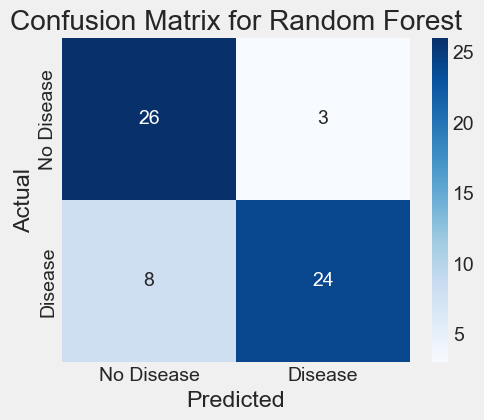


Support Vector Machine Model Evaluation:
Accuracy: 0.8852459016393442
AUC-ROC: 0.9224137931034482
Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.93      0.89        29
           1       0.93      0.84      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.89      0.89        61
weighted avg       0.89      0.89      0.89        61



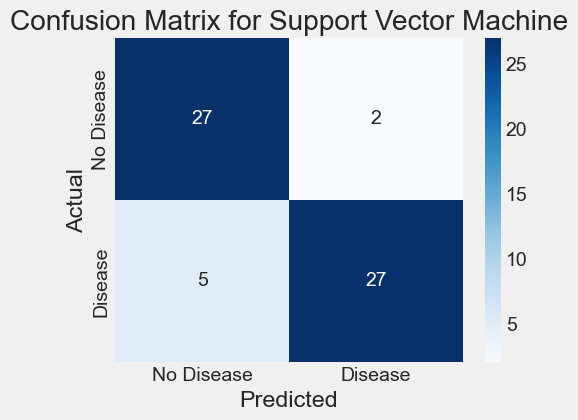

In [127]:
# Model Selection & Training
models = {
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "Support Vector Machine": SVC(probability=True, kernel='rbf', random_state=42)
}

# Train models and evaluate performance
for name, model in models.items():
    model.fit(X_train, y_train)  # Train model
    y_pred = model.predict(X_test)  # Predictions
    y_proba = model.predict_proba(X_test)[:, 1]  # Probability scores for AUC-ROC
    
    # Model Evaluation
    print(f"\n{name} Model Evaluation:")
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("AUC-ROC:", roc_auc_score(y_test, y_proba))
    print("Classification Report:\n", classification_report(y_test, y_pred))
    
    # Confusion Matrix Visualization
    plt.figure(figsize=(5, 4))
    sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", cmap="Blues",
                xticklabels=["No Disease", "Disease"], yticklabels=["No Disease", "Disease"])
    plt.title(f'Confusion Matrix for {name}')
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()


In [128]:
# Model Selection & Training
models = {
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "Support Vector Machine": SVC(probability=True, kernel='rbf', random_state=42)
}

# Train models and evaluate performance
for name, model in models.items():
    model.fit(X_train, y_train)  # Train model
    y_pred = model.predict(X_test)  # Predictions
    y_proba = model.predict_proba(X_test)[:, 1]  # Probability scores for AUC-ROC
    
    # Model Evaluation
    print(f"\n{name} Model Evaluation:")
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("AUC-ROC:", roc_auc_score(y_test, y_proba))
    print("Classification Report:\n", classification_report(y_test, y_pred))



Random Forest Model Evaluation:
Accuracy: 0.819672131147541
AUC-ROC: 0.9229525862068966
Classification Report:
               precision    recall  f1-score   support

           0       0.76      0.90      0.83        29
           1       0.89      0.75      0.81        32

    accuracy                           0.82        61
   macro avg       0.83      0.82      0.82        61
weighted avg       0.83      0.82      0.82        61


Support Vector Machine Model Evaluation:
Accuracy: 0.8852459016393442
AUC-ROC: 0.9224137931034482
Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.93      0.89        29
           1       0.93      0.84      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.89      0.89        61
weighted avg       0.89      0.89      0.89        61



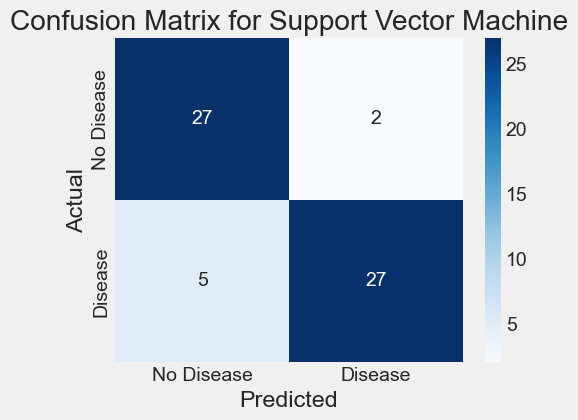

In [129]:
    # Confusion Matrix Visualization
    plt.figure(figsize=(5, 4))
    sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", cmap="Blues",
                xticklabels=["No Disease", "Disease"], yticklabels=["No Disease", "Disease"])
    plt.title(f'Confusion Matrix for {name}')
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()


In [130]:
pd.set_option("display.float", "{:.2f}".format)
df.describe()

,age,trestbps,chol,thalach,oldpeak,target,chol_age_ratio
count,303.00,303.00,303.00,303.00,303.00,303.00,303.00
mean,0.00,-0.00,-0.00,-0.00,0.00,0.54,0.00
std,1.00,1.00,1.00,1.00,1.00,0.50,1.00
min,-2.80,-2.15,-2.32,-3.44,-0.90,0.00,-2.30
25%,-0.76,-0.66,-0.68,-0.71,-0.90,0.00,-0.72
50%,0.07,-0.09,-0.12,0.15,-0.21,1.00,-0.14
75%,0.73,0.48,0.55,0.72,0.48,1.00,0.61
max,2.50,3.91,6.14,2.29,4.45,1.00,3.43


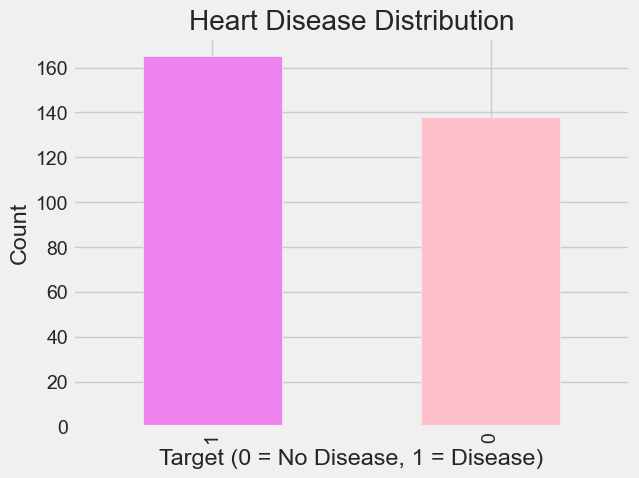

In [131]:
df['target'].value_counts().plot(kind="bar", color=["violet", "pink"])
plt.title("Heart Disease Distribution")
plt.xlabel("Target (0 = No Disease, 1 = Disease)")
plt.ylabel("Count")
plt.show()


In [132]:
df.isna().sum()

age                0
trestbps           0
chol               0
thalach            0
oldpeak            0
target             0
chol_age_ratio     0
sex_1              0
cp_1               0
cp_2               0
cp_3               0
fbs_1              0
restecg_1          0
restecg_2          0
exang_1            0
slope_1            0
slope_2            0
ca_1               0
ca_2               0
ca_3               0
ca_4               0
thal_1             0
thal_2             0
thal_3             0
age_group_40-49    0
age_group_50-59    0
age_group_60-69    0
age_group_70-79    0
dtype: int64

In [133]:
categorical_val = []
continous_val = []
for column in df.columns:
    print('==============================')
    print(f"{column} : {df[column].unique()}")
    if len(df[column].unique()) <= 10:
        categorical_val.append(column)
    else:
        continous_val.append(column)

age : [ 0.9521966  -1.91531289 -1.47415758  0.18017482  0.29046364 -1.1432911
 -0.26098049 -0.04040284 -0.7021358  -0.59184697  1.06248543  0.40075247
 -0.48155814  1.28306308 -1.25357993  1.61392956  0.5110413  -1.36386876
  0.73161895 -1.58444641  1.83450721 -0.37126932  1.17277425 -0.15069166
 -0.92271345 -1.03300228 -1.69473524 -0.81242462  0.84190778 -2.24617937
 -2.13589054 -2.7976235   0.06988599  0.62133012  1.39335191  1.50364073
  2.16537369  2.38595135  1.72421839 -1.80502406  2.49624017]
trestbps : [ 0.76395577 -0.09273778 -0.66386682  0.47839125  2.30600417  1.04952029
 -1.23499586  0.19282673  1.62064933 -1.52056038 -0.3783023   0.59261706
  1.33508481 -1.57767328  0.36416545 -0.20696359 -1.34922166  0.13571383
 -0.54964101 -0.94943134 -0.77809263 -1.80612489 -0.43541521 -2.14880232
 -1.12077005 -1.69189909  1.1637461  -1.74901199  0.02148802  0.93529448
  2.64868159 -0.14985069  2.7629074   0.24993964 -0.3211894  -1.46344747
  1.39219771  2.19177836  0.82106867 -0.835205

TypeError: numpy boolean subtract, the `-` operator, is not supported, use the bitwise_xor, the `^` operator, or the logical_xor function instead.

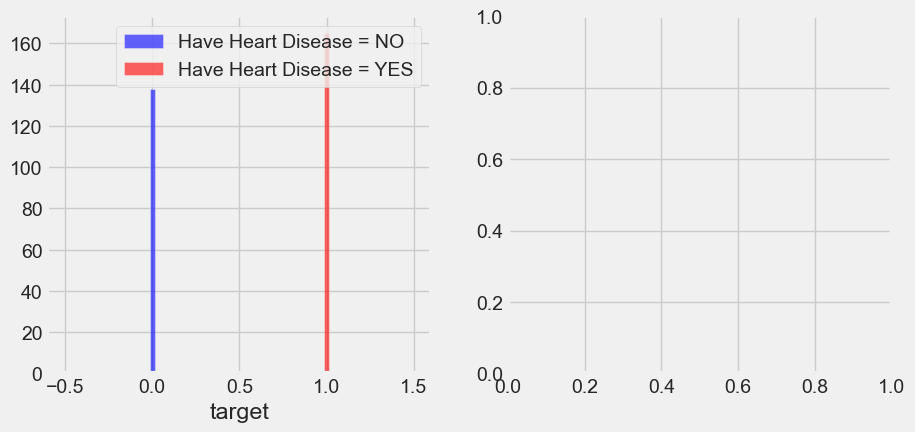

In [134]:
plt.figure(figsize=(15, 15))

for i, column in enumerate(categorical_val, 1):
    plt.subplot(3, 3, i)
    df[df["target"] == 0][column].hist(bins=35, color='blue', label='Have Heart Disease = NO', alpha=0.6)
    df[df["target"] == 1][column].hist(bins=35, color='red', label='Have Heart Disease = YES', alpha=0.6)
    plt.legend()
    plt.xlabel(column)

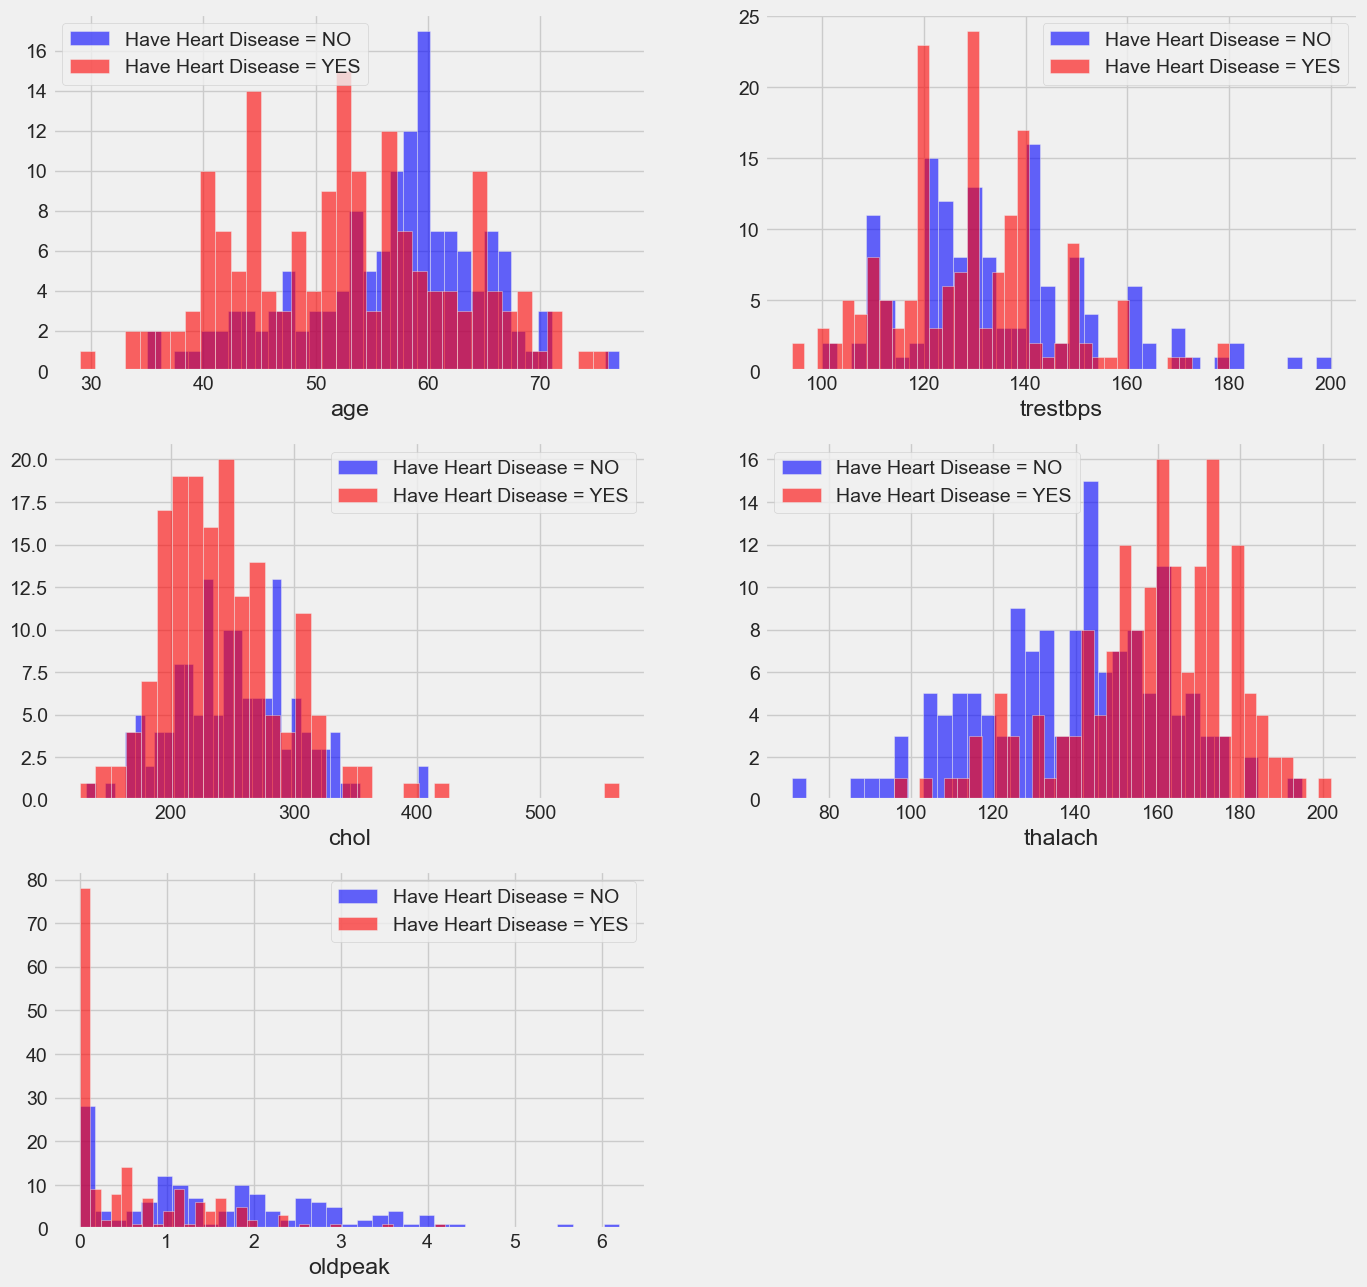

In [ ]:
plt.figure(figsize=(15, 15))

for i, column in enumerate(continous_val, 1):
    plt.subplot(3, 2, i)
    df[df["target"] == 0][column].hist(bins=35, color='blue', label='Have Heart Disease = NO', alpha=0.6)
    df[df["target"] == 1][column].hist(bins=35, color='red', label='Have Heart Disease = YES', alpha=0.6)
    plt.legend()
    plt.xlabel(column)

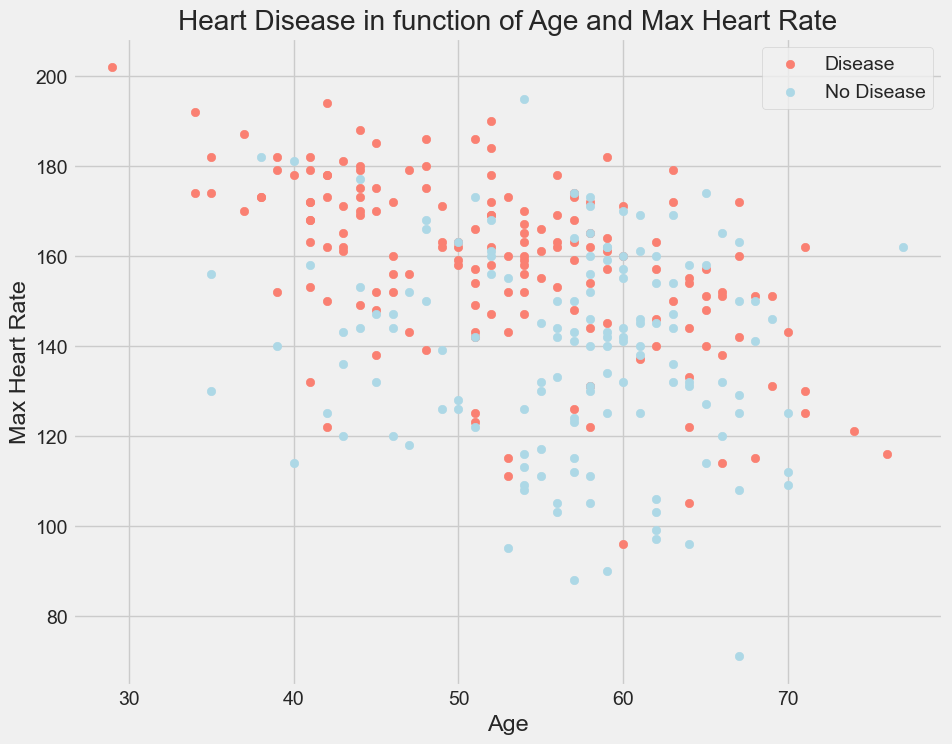

In [ ]:
plt.figure(figsize=(10, 8))

# Scatter with postivie examples
plt.scatter(df.age[df.target==1],
            df.thalach[df.target==1],
            c="salmon")

# Scatter with negative examples
plt.scatter(df.age[df.target==0],
            df.thalach[df.target==0],
            c="lightblue")

# Add some helpful info
plt.title("Heart Disease in function of Age and Max Heart Rate")
plt.xlabel("Age")
plt.ylabel("Max Heart Rate")
plt.legend(["Disease", "No Disease"]);

(14.5, -0.5)

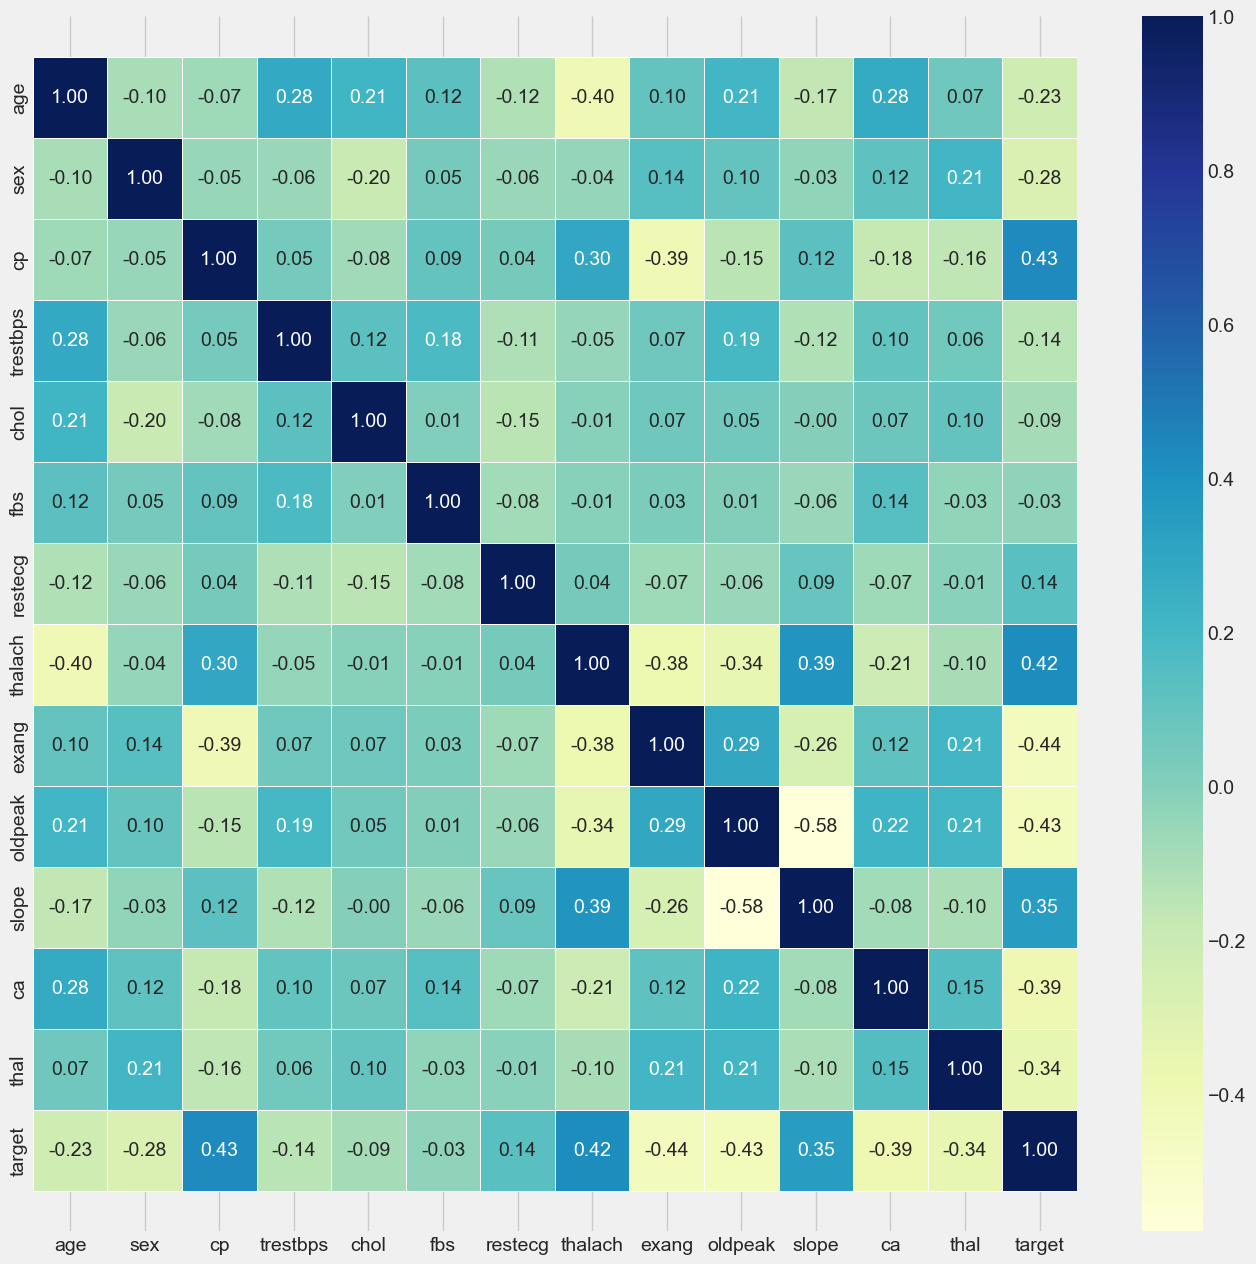

In [ ]:
corr_matrix = df.corr()
fig, ax = plt.subplots(figsize=(15, 15))
ax = sns.heatmap(corr_matrix,
                 annot=True,
                 linewidths=0.5,
                 fmt=".2f",
                 cmap="YlGnBu");
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)


<Axes: title={'center': 'Correlation with target'}>

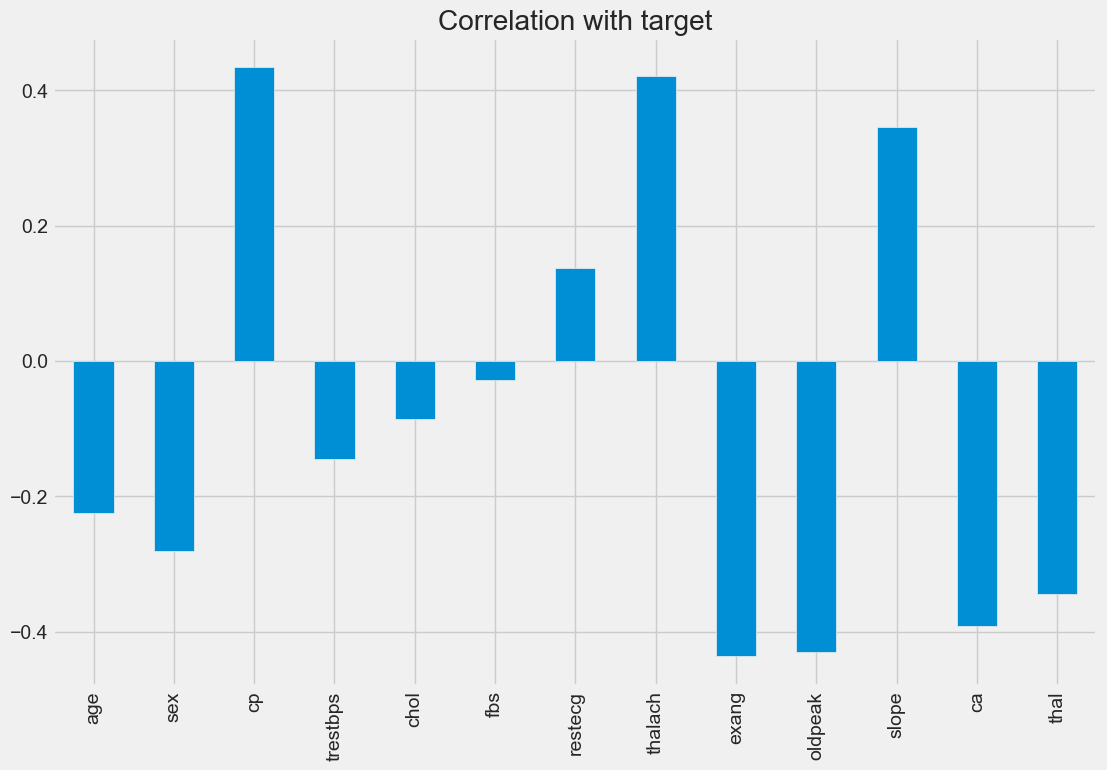

In [ ]:
df.drop('target', axis=1).corrwith(df.target).plot(kind='bar', grid=True, figsize=(12, 8), 
                                                   title="Correlation with target")


In [ ]:
categorical_val.remove('target')
dataset = pd.get_dummies(df, columns = categorical_val)

from sklearn.preprocessing import StandardScaler

s_sc = StandardScaler()
col_to_scale = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
dataset[col_to_scale] = s_sc.fit_transform(dataset[col_to_scale])

In [135]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

def print_score(clf, X_train, y_train, X_test, y_test, train=True):
    if train:
        pred = clf.predict(X_train)
        clf_report = pd.DataFrame(classification_report(y_train, pred, output_dict=True))
        print("Train Result:\n================================================")
        print(f"Accuracy Score: {accuracy_score(y_train, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_train, pred)}\n")
        
    elif train==False:
        pred = clf.predict(X_test)
        clf_report = pd.DataFrame(classification_report(y_test, pred, output_dict=True))
        print("Test Result:\n================================================")        
        print(f"Accuracy Score: {accuracy_score(y_test, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_test, pred)}\n")


In [136]:
from sklearn.model_selection import train_test_split

X = dataset.drop('target', axis=1)
y = dataset.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [137]:
from sklearn.linear_model import LogisticRegression

lr_clf = LogisticRegression(solver='liblinear')
lr_clf.fit(X_train, y_train)

print_score(lr_clf, X_train, y_train, X_test, y_test, train=True)
print_score(lr_clf, X_train, y_train, X_test, y_test, train=False)

Train Result:
Accuracy Score: 86.79%
_______________________________________________
CLASSIFICATION REPORT:
              0      1  accuracy  macro avg  weighted avg
precision  0.88   0.86      0.87       0.87          0.87
recall     0.82   0.90      0.87       0.86          0.87
f1-score   0.85   0.88      0.87       0.87          0.87
support   97.00 115.00      0.87     212.00        212.00
_______________________________________________
Confusion Matrix: 
 [[ 80  17]
 [ 11 104]]

Test Result:
Accuracy Score: 86.81%
_______________________________________________
CLASSIFICATION REPORT:
              0     1  accuracy  macro avg  weighted avg
precision  0.87  0.87      0.87       0.87          0.87
recall     0.83  0.90      0.87       0.86          0.87
f1-score   0.85  0.88      0.87       0.87          0.87
support   41.00 50.00      0.87      91.00         91.00
_______________________________________________
Confusion Matrix: 
 [[34  7]
 [ 5 45]]



In [138]:
test_score = accuracy_score(y_test, lr_clf.predict(X_test)) * 100
train_score = accuracy_score(y_train, lr_clf.predict(X_train)) * 100

results_df = pd.DataFrame(data=[["Logistic Regression", train_score, test_score]], 
                          columns=['Model', 'Training Accuracy %', 'Testing Accuracy %'])
results_df

,Model,Training Accuracy %,Testing Accuracy %
0,Logistic Regression,86.79,86.81
